In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
df.shape

(487, 65)

In [4]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,42.171200,22.380900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [5]:
df.set_index('Country/Region', inplace=True)

In [6]:
df_country_sum = df.groupby('Country/Region').sum()

In [7]:
df_country_sum_total = df_country_sum.iloc[:,-1]

In [8]:
df_country_sum_total = df_country_sum_total.sort_values(ascending = False)

In [9]:
df_country_sum_total_top10  = df_country_sum_total.iloc[0:10]

In [10]:
df_country_sum_total_top10 

Country/Region
China             81397
Italy             59138
US                33272
Spain             28768
Germany           24873
Iran              21638
France            16176
Korea, South       8897
Switzerland        7245
United Kingdom     5741
Name: 3/22/20, dtype: int64

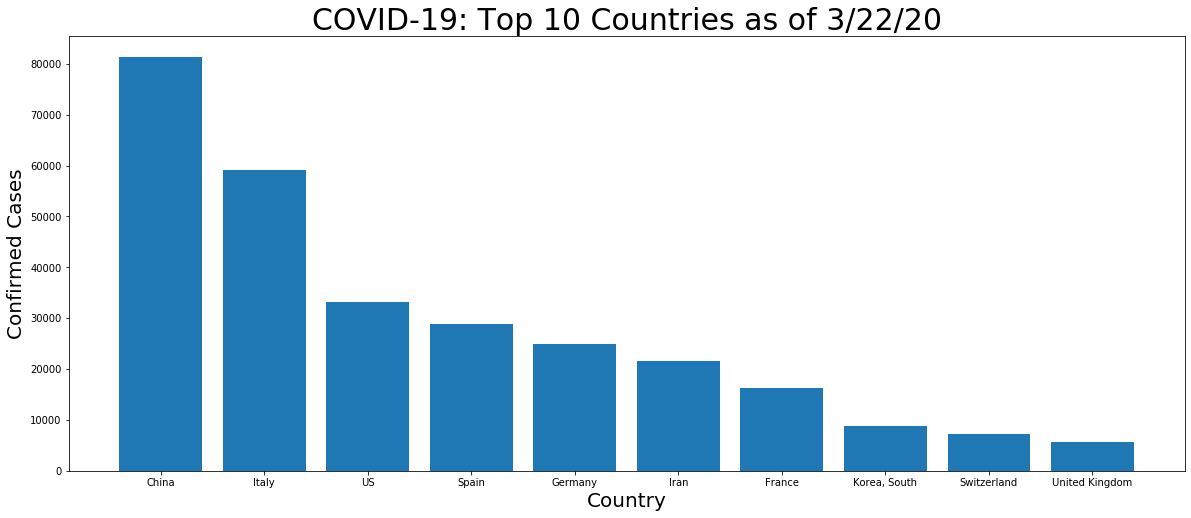

In [11]:
fig, ax = plt.subplots(figsize = (20,8))
ax.bar(df_country_sum_total_top10.index, df_country_sum_total_top10)
ax.set_xlabel('Country', size = 20)
ax.set_ylabel('Confirmed Cases', size = 20)
ax.set_title(f'COVID-19: Top 10 Countries as of {df.columns[-1]}', size = 30);

In [12]:
df.columns

Index(['Province/State', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [18]:
for i in range(3, len(df.columns) - 2):
    df_country_sum_i = df_country_sum.iloc[:, i : i+1]
    df_country_sum_i = df_country_sum_i.sort_values(df.columns[i], ascending = False)
    df_country_sum_i = df_country_sum_i.iloc[0:10]
    fig, ax = plt.subplots(figsize = (20,8))
    ax.bar(df_country_sum_total_top10.index, df_country_sum_total_top10)
    ax.set_xlabel('Country', size = 20)
    ax.set_ylabel('Confirmed Cases', size = 20)
    ax.set_title(f'COVID-19: Top 10 Countries as of {df.columns[-1]}', size = 30);

KeyError: '1/22/20'